In [1]:
import pandas as pd

# Step 1: Load Data

In [3]:
from db_connect import get_connection

table_name = input("Enter the table name: ").strip()

# This portion of the project is using the player_table

engine = get_connection()
df = pd.read_sql(f"SELECT * FROM {table_name};", con = engine)
 

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's
2,Significant Contributor,5.0,Dylan Addae-Wusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue


In [5]:
df['year'].unique()

array([2022, 2023, 2024, 2019, 2020, 2021])

In [6]:
df['player_id'].nunique()

10991

# Step 2: Clean DataFrame

In [8]:
from player_dev_clean_df import clean_df

df_train, df_2024_transfers, df_2024_no_transfers, valid_players = clean_df(df)

print(df_train.shape, df_2024_transfers.shape, df_2024_no_transfers.shape)

(2433, 74) (218, 74) (278, 74)


# Step 3: Feature Selection, Engineering & Scaling

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import transfer_vars as tv  # alias for old model_vars

# Use original o_rtg-based training data
train_data_scaled = tv.split_scale(df_train)

# Extract unscaled X for feature names
_, X_unscaled, player_names = tv.model_vars(df_train)

# Get column names from model_vars
X_cols = pd.get_dummies(df_train['role'], drop_first=True).columns.tolist() + [
    'poss_pct', 'shots_pct', 'e_fg_pct', 'ts_pct', 'or_pct', 'dr_pct',
    'a_rate', 'to_rate', 'blk_pct', 'stl_pct', 'f_cper40', 'f_dper40',
    'ft_rate', 'ftm', 'fta', 'ft_pct', 'fgm_2', 'fga_2', 'fg_2_pct',
    'fgm_3', 'fga_3', 'fg_3_pct', 'min_pct'
]

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data_scaled["X_train"], train_data_scaled["Y_train"])

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'feature': X_cols, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Display top features
pd.set_option('display.max_rows', None)
display(feat_imp)

,feature,importance
9,ts_pct,0.716567
13,to_rate,0.173631
7,shots_pct,0.012936
8,e_fg_pct,0.011229
10,or_pct,0.008773
12,a_rate,0.008765
6,poss_pct,0.007226
11,dr_pct,0.006522
28,min_pct,0.005818
21,ft_pct,0.004962


In [14]:
import importlib
import eng_vars as ev
importlib.reload(ev)

from sklearn.ensemble import RandomForestRegressor


# Step 1: Get scaled training data
train_data_scaled = ev.split_scale(df_train)

# Step 2: Get unscaled feature matrix and names
_, X, _ = ev.model_vars(df_train)

# Step 3: Rebuild feature names to match model_vars
role_dummies = pd.get_dummies(df_train['role'], drop_first=True)
role_cols = list(role_dummies.columns)

base_cols = [
    'poss_pct', 'shots_pct', 
    'e_fg_pct', 'ts_pct', 
    'or_pct', 'dr_pct',
    'a_rate', 'to_rate', 'blk_pct', 'stl_pct', 
    'f_cper40', 'f_dper40',
    'ftm', 'fta', 'fgm_2', 'fga_2', 'fgm_3', 'fga_3'
]

engineered_cols = [
    'min_pct', 
    'scoring_efficiency_volume',
    'draw_vs_commit_ratio',
    'height_in'
]

X_cols = role_cols + base_cols + engineered_cols

# Step 4: Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_data_scaled["X_train"], train_data_scaled["Y_train"])

# Step 5: Compute and display feature importances
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'feature': X_cols, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Step 6: Display
pd.set_option('display.max_rows', None)
display(feat_imp)

,feature,importance
9,ts_pct,0.202146
24,min_pct,0.199610
11,dr_pct,0.149190
18,ftm,0.109240
12,a_rate,0.101126
20,fgm_2,0.096593
13,to_rate,0.042558
8,e_fg_pct,0.020547
21,fga_2,0.017225
10,or_pct,0.012907


In [16]:
import eng_vars as ev
train_data_scaled = ev.split_scale(df_train)
scaler_x = train_data_scaled['scaler_x']

# Step 4: Stack Models

In [18]:
from player_dev_ml_models import ml_stack_model_w_grid_search

best_stack_model = ml_stack_model_w_grid_search(train_data_scaled["X_train"], train_data_scaled["Y_train"])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=50; total time=   5.0s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=50; total time=   5.0s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=50; total time=   5.0s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=50; total time=   5.1s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=50; total time=   5.3s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=100; total time=   7.5s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=100; total time=   7.5s
[CV] END final_estimator__n_estimators=50, gb__max_iter=100, rf__max_depth=5, rf__n_estimators=100; total time=

In [19]:
best_stack_model.fit(train_data_scaled["X_train"], train_data_scaled["Y_train"])

,estimators,"[('rf', ...), ('gb', ...)]"
,final_estimator,GradientBoost...ndom_state=42)
,cv,5
,n_jobs,None
,passthrough,True
,verbose,0
,n_estimators,50
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1


# Step 5: Model Results

In [41]:
import importlib
import p_dev_mdl_rslts as p_dev_mdl_rslts
importlib.reload(p_dev_mdl_rslts)

from p_dev_mdl_rslts import model_vs_actual, model_results

summary_2024_transfers = model_vs_actual(df_2024_transfers, scaler_x, best_stack_model)
summary_2024_no_transfers = model_vs_actual(df_2024_no_transfers, scaler_x, best_stack_model)


Mean Squared Error: 0.10
R² Score: 0.809


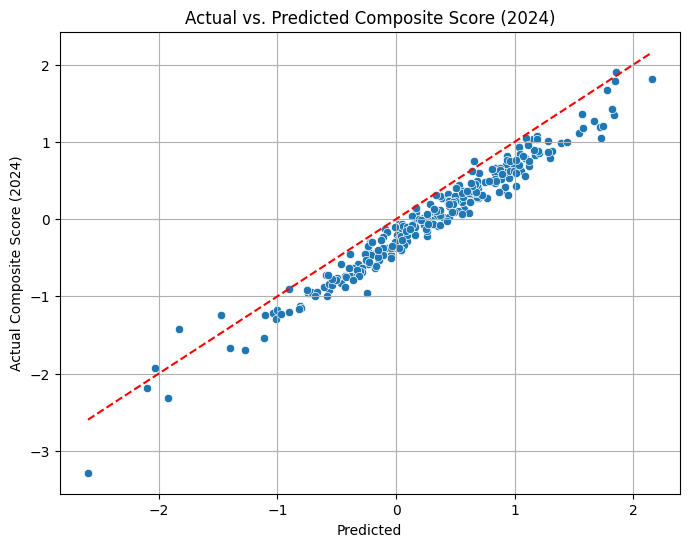

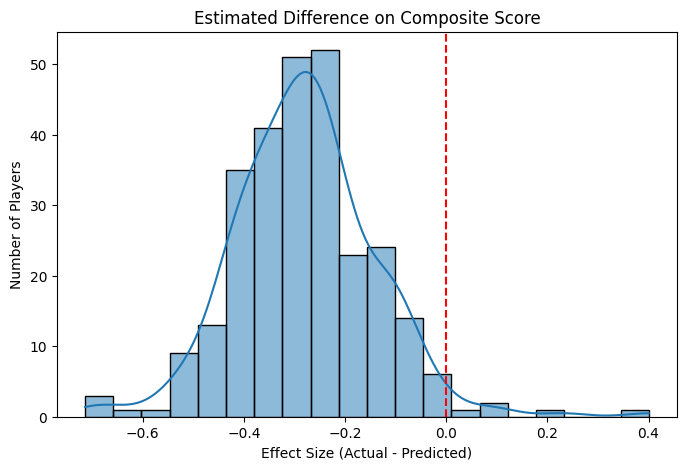

In [42]:
# Results to test the models predicted values for players who stayed 4 years at one school. 
# Model trained on 3 years and then predicts year 4 vs actual for year 4 at that school
top0, bottom0 = model_results(summary_2024_no_transfers)

In [43]:
top0

,player,Actual Composite Score (2024),Predicted,Estimated Difference
256,Harouna Sissoko,-1.429460,-1.829800,0.400340
70,Bryson Childress,-1.244712,-1.475131,0.230419
258,Malik Wade,-1.929890,-2.031511,0.101621
148,Mason Gillis,0.756499,0.658246,0.098254
205,Max Fiedler,1.903022,1.853218,0.049804


In [44]:
bottom0

,player,Actual Composite Score (2024),Predicted,Estimated Difference
55,Dylan Branson,-0.961680,-0.247968,-0.713713
239,Quoiren Waldon,-3.284698,-2.597817,-0.686881
216,Isaiah Hill,1.047328,1.727462,-0.680134
209,Golden Dike,0.314810,0.944716,-0.629906
131,Josh Pierre-Louis,0.426031,1.014894,-0.588863


Mean Squared Error: 0.05
R² Score: 0.902


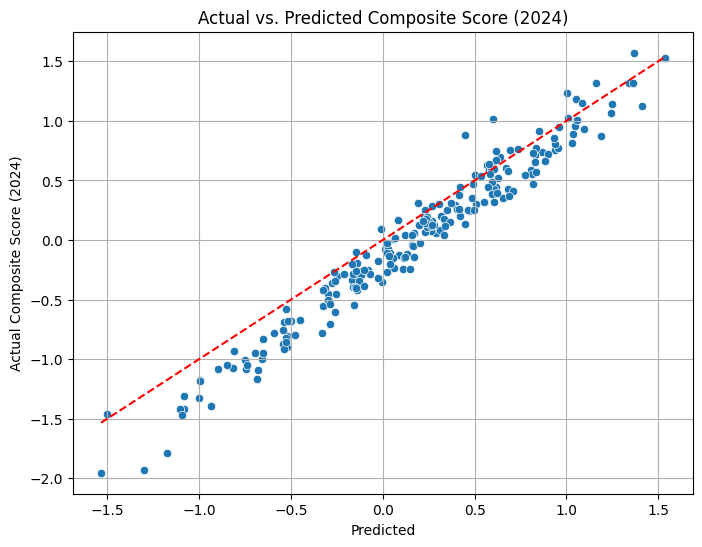

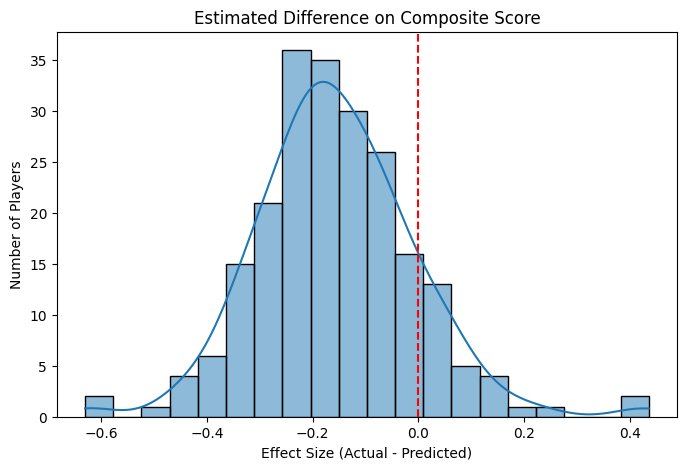

In [45]:
# Results to test the models predicted values for players who stayed 3 years at one school before transferring. 
# Model trained on 3 years and then predicted year 4 as if the player stayed at same school vs actual for year 4 at different school
top1, bottom1 = model_results(summary_2024_transfers)

In [46]:
top1

,player,Actual Composite Score (2024),Predicted,Estimated Difference
50,Jared Bynum,0.884574,0.449462,0.435112
13,Julian Rishwain,1.011888,0.597477,0.414411
32,Nate Martin,1.234266,1.004136,0.230130
12,Zyon Pullin,1.571381,1.365961,0.205419
58,Joe Anderson,1.318988,1.162406,0.156583


In [47]:
bottom1

,player,Actual Composite Score (2024),Predicted,Estimated Difference
135,Terrell Williams,-1.929569,-1.299533,-0.630036
88,Evan Johnson,-1.786404,-1.173040,-0.613364
112,Jeremiah Oden,-1.165407,-0.686614,-0.478792
200,Tre Wood,-1.396853,-0.936584,-0.460269
69,Anthony Crump,-0.784138,-0.332340,-0.451799


In [48]:
# Model 1: Players who stayed
avg_diff_model1 = summary_2024_no_transfers["Estimated Difference"].mean()

# Model 2: Transfers (actual vs predicted if stayed)
avg_diff_model2 = summary_2024_transfers["Estimated Difference"].mean()

print(f"Average diff (Model 1 - no transfers): {avg_diff_model1:.4f}")
print(f"Average diff (Model 2 - transfers): {avg_diff_model2:.4f}")

Average diff (Model 1 - no transfers): -0.2797
Average diff (Model 2 - transfers): -0.1566


On average, players who stayed at their original school for four years performed 0.28 points below what our model predicted based on their first three years.
Players who transferred after three years also underperformed expectations, but by a smaller margin of 0.16 points.
Players are not neccessarily worse, just their growth between their third to fourth year is less than in prior years (this makes sense, fourth year players are not expected to make the same jump in their game as other players).
This suggests that while both groups saw less growth than predicted in year 4, transferring may mitigate that shortfall. In other words, transferring might offer a performance advantage — not by guaranteeing improvement, but by helping players avoid the stagnation or slower growth they may have experienced if they had stayed.
These findings provide preliminary evidence that transferring can be beneficial for maintaining or improving a player’s developmental trajectory in year 4.

# Step 6: Push Data to Database

In [19]:
## 7/10/25 - The push_data_to_db needs updated ## 

# from push_db_data import push_data_to_db
# 
# push_data_to_db(summary_2024)